In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,5)

In [4]:
datacovid = pd.read_csv('datasetcovidsamplejkt.csv')

datacovid.sample(5)

,Tanggal,Variant_Suspect,Day,ID_CUM_POSITIVE,ID_CUM_HOSPITALIZED,ID_CUM_CURED,ID_CUM_DEATH,JKT_CUM_POSITIVE,JKT_CUM_HOSPITALIZED,JKT_CUM_CURED,...,JKT_DAILY_POSTEST,PoF_Positive,JKT_DAILY_NEGTEST,JKT_DAILY_POSTRATE,PoF_PostRate,JKT_CONS_VALUE,CoF_HSE,PoF_Spec_X_PostRate,Risk,Risk_Criteria
158,06/08/2020,Alpha-Beta-Gamma,159,118753,37587,75645,5521,23863,2552,15006,...,776,2,8015,0.088272,1,774,2,1.0,2.0,LOW
380,16/03/2021,Alpha-Beta-Gamma,381,1430458,134042,1257663,38753,362370,2751,350561,...,1719,3,13388,0.113788,2,389,2,3.0,6.0,HIGH
726,44617,Omicron,91,5457775,573955,4736234,147586,1158907,6540,1091226,...,3957,3,32160,0.109561,2,4144,3,NaN,NaN,NaN
333,28/01/2021,Alpha-Beta-Gamma,334,1037993,166540,842122,29331,259305,3946,232701,...,3160,3,17152,0.155573,2,3388,3,3.0,9.0,HIGH
332,27/01/2021,Alpha-Beta-Gamma,333,1024298,164113,831330,28855,256416,3773,229981,...,3143,3,18780,0.143365,2,1400,2,3.0,6.0,HIGH


In [3]:
datacovid.describe(include="all")

,Tanggal,Variant_Suspect,Day,ID_CUM_POSITIVE,ID_CUM_HOSPITALIZED,ID_CUM_CURED,ID_CUM_DEATH,JKT_CUM_POSITIVE,JKT_CUM_HOSPITALIZED,JKT_CUM_CURED,...,JKT_DAILY_POSTEST,PoF_Positive,JKT_DAILY_NEGTEST,JKT_DAILY_POSTRATE,PoF_PostRate,JKT_CONS_VALUE,CoF_HSE,PoF_Spec_X_PostRate,Risk,Risk_Criteria
count,742,742,742.000000,7.420000e+02,742.000000,7.420000e+02,742.000000,7.420000e+02,742.000000,7.420000e+02,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,724.000000,724.000000,724
unique,742,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,01/03/2020,Alpha-Beta-Gamma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LOW
freq,1,428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398
mean,NaN,NaN,160.664420,1.870663e+06,109654.830189,1.702888e+06,58119.962264,4.112156e+05,3839.588949,3.910097e+05,...,1644.047170,2.000000,11990.683288,0.101635,1.552561,1737.607817,2.022911,1.685083,3.743094,NaN
std,NaN,NaN,119.018543,1.790874e+06,138150.580245,1.683090e+06,57167.892369,3.712945e+05,4957.052044,3.603415e+05,...,2663.515179,0.708537,8470.447518,0.089302,0.618485,3031.112256,0.714804,0.821730,2.867333,NaN
min,NaN,NaN,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,1.000000,3.000000,0.000000,1.000000,-1375.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,62.250000,1.815515e+05,17189.750000,1.304920e+05,7649.500000,4.265450e+04,1036.750000,3.191175e+04,...,140.750000,1.250000,6472.250000,0.039610,1.000000,133.000000,2.000000,1.000000,2.000000,NaN
50%,NaN,NaN,133.000000,1.376749e+06,61765.500000,1.192083e+06,37210.000000,3.495080e+05,2608.000000,3.365215e+05,...,764.000000,2.000000,11055.000000,0.088055,1.000000,701.000000,2.000000,1.000000,2.000000,NaN
75%,NaN,NaN,242.750000,4.145682e+06,130033.000000,3.873782e+06,137625.500000,8.534920e+05,4413.000000,8.355325e+05,...,1632.500000,2.750000,15589.750000,0.132690,2.000000,1713.750000,3.000000,2.000000,6.000000,NaN


<AxesSubplot:xlabel='Variant_Suspect', ylabel='JKT_DAILY_DEATH'>

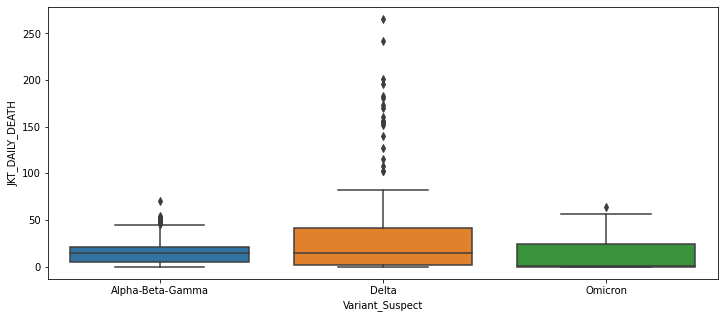

In [5]:
sns.boxplot(x="Variant_Suspect", y="JKT_DAILY_DEATH", data=datacovid)

<AxesSubplot:xlabel='Variant_Suspect', ylabel='count'>

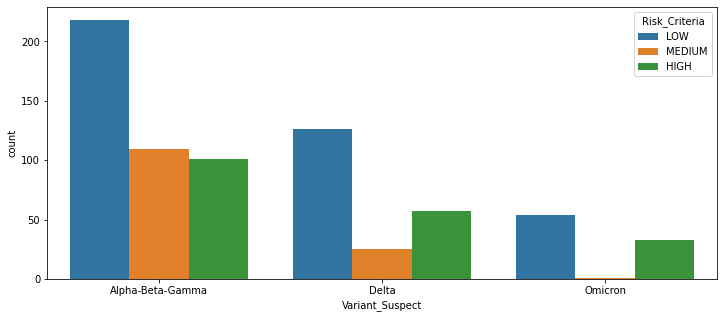

In [6]:
sns.countplot(x="Variant_Suspect", hue="Risk_Criteria", data=datacovid)

Text(0.5, 1.01, 'Pair Plot Covid Jakarta')

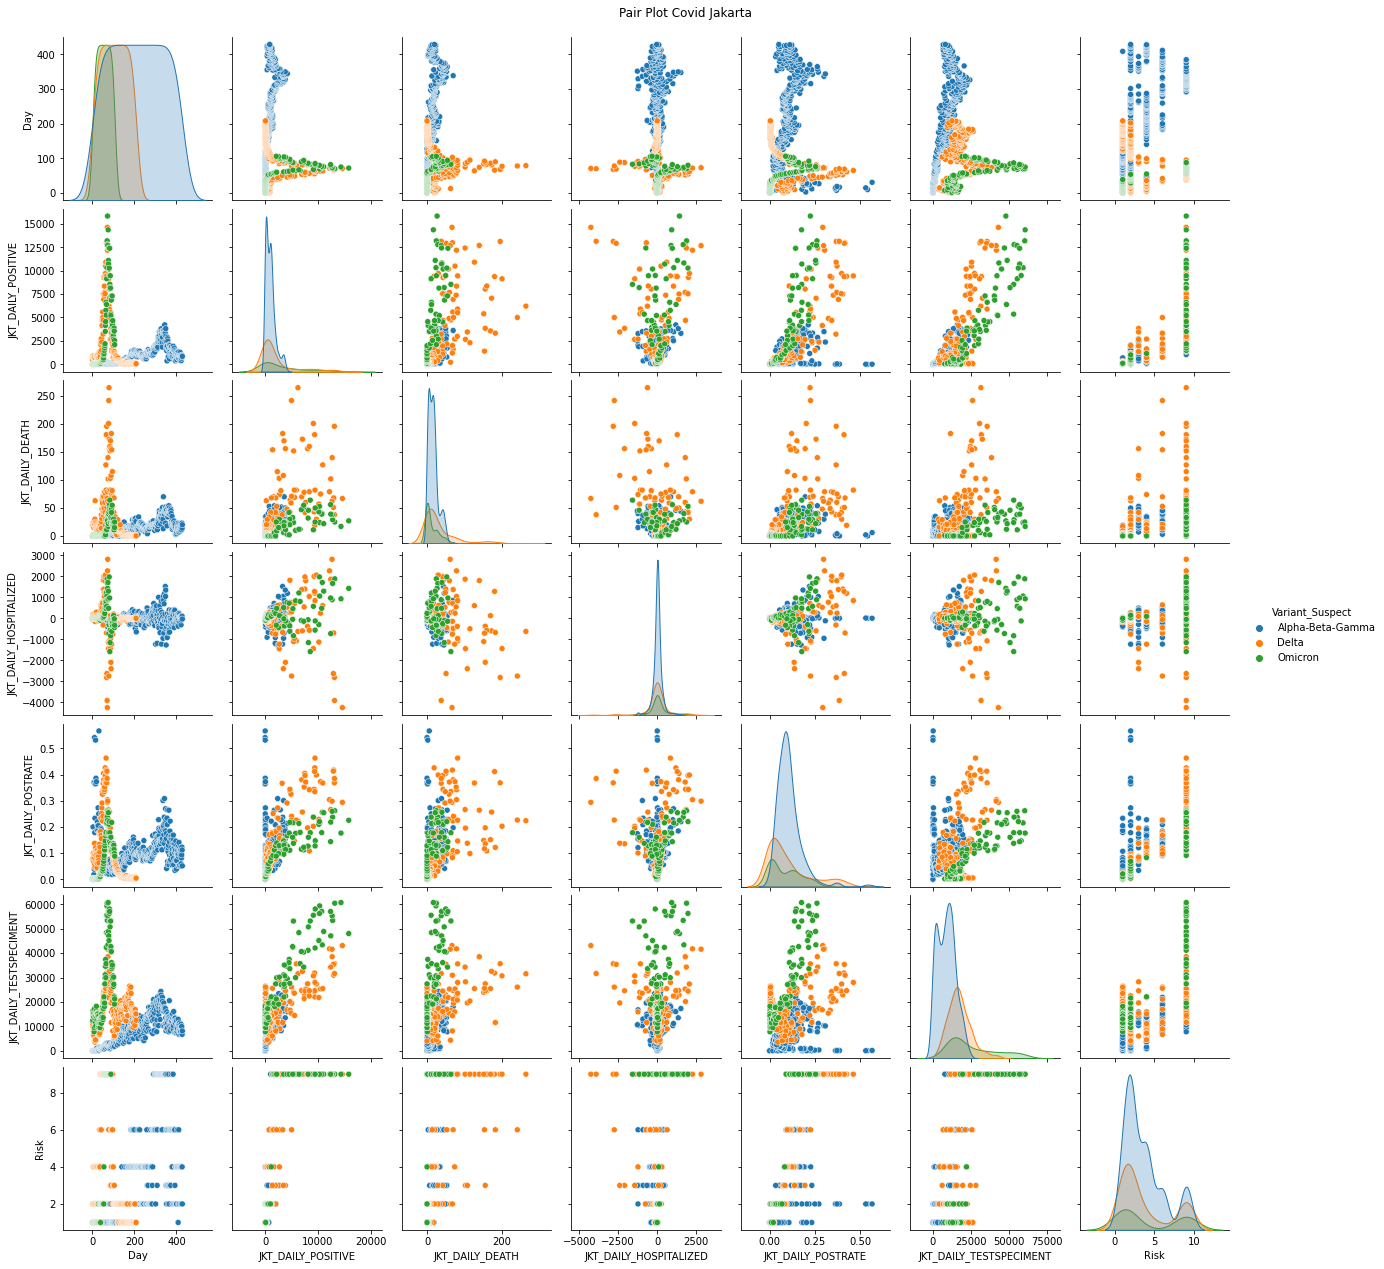

In [7]:
covid_JKT = datacovid.loc[:,['Variant_Suspect','Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','JKT_DAILY_TESTSPECIMENT','Risk','Risk_Criteria']]

sns.pairplot(covid_JKT,hue='Variant_Suspect').fig.suptitle("Pair Plot Covid Jakarta", y=1.01)

In [8]:
covid_ABG = datacovid.loc[datacovid.Variant_Suspect=='Alpha-Beta-Gamma',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','JKT_DAILY_TESTSPECIMENT','Risk','Risk_Criteria']]
covid_Delta = datacovid.loc[datacovid.Variant_Suspect=='Delta',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','JKT_DAILY_TESTSPECIMENT','Risk','Risk_Criteria']]
covid_Omicron = datacovid.loc[datacovid.Variant_Suspect=='Omicron',['Day','JKT_DAILY_POSITIVE','JKT_DAILY_DEATH','JKT_DAILY_HOSPITALIZED','JKT_DAILY_POSTRATE','JKT_DAILY_TESTSPECIMENT','Risk','Risk_Criteria']]

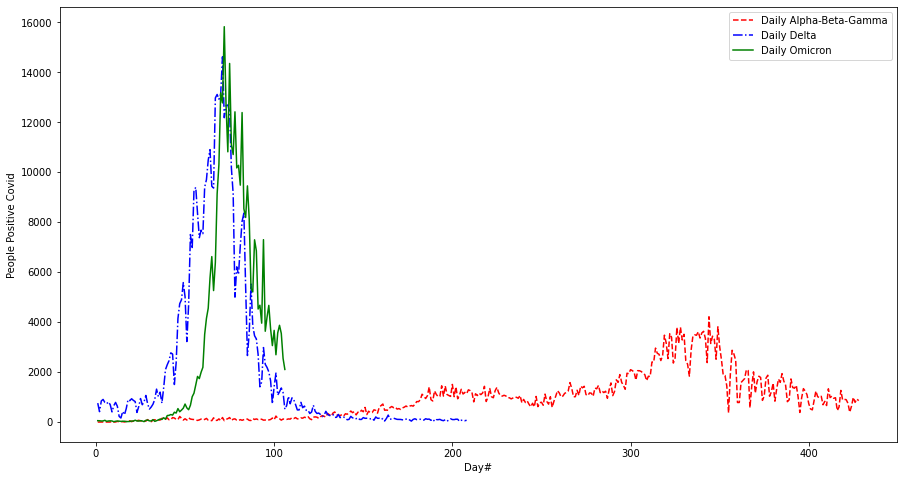

In [9]:
y1 = covid_ABG.JKT_DAILY_POSITIVE
y2 = covid_Delta.JKT_DAILY_POSITIVE
y3 = covid_Omicron.JKT_DAILY_POSITIVE

x1 = covid_ABG.Day
x2 = covid_Delta.Day
x3 = covid_Omicron.Day

plt.rcParams["figure.figsize"] = (15,8)
plt.plot(x1,y1,'--r',label="Daily Alpha-Beta-Gamma")
plt.plot(x2,y2,'-.b',label="Daily Delta")
plt.plot(x3,y3,'g', label="Daily Omicron")
plt.xlabel('Day#')
plt.ylabel('People Positive Covid')
plt.legend()
plt.show()

Text(0.5, 1.01, 'Pair Plot Covid Variant Omicron')

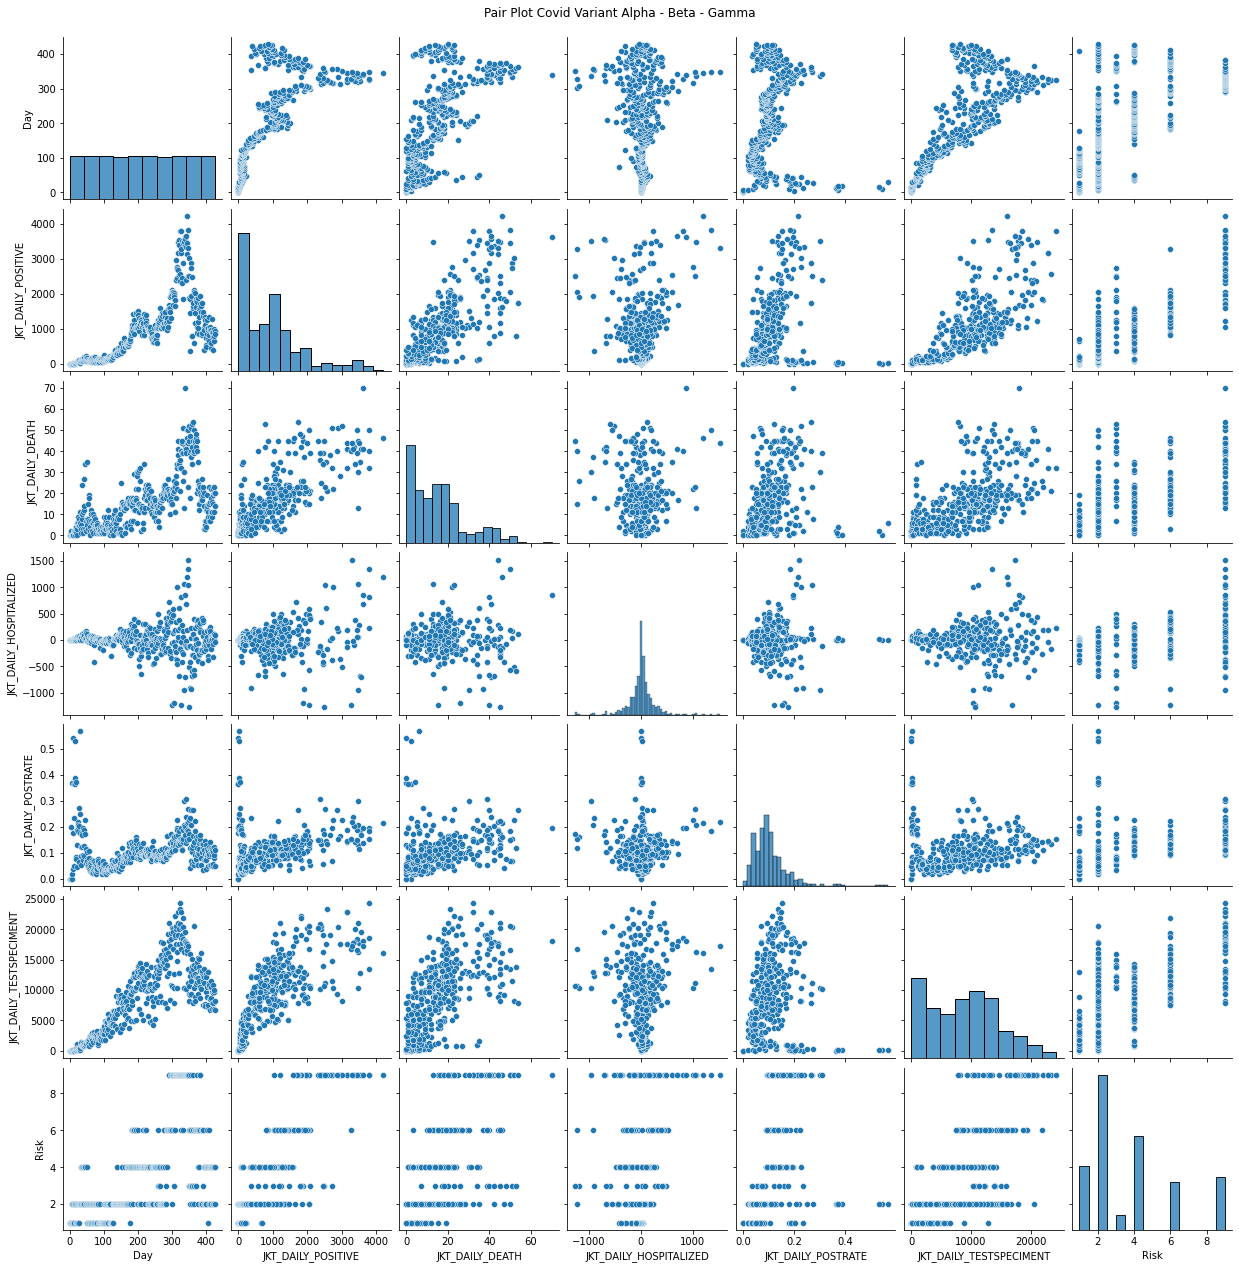

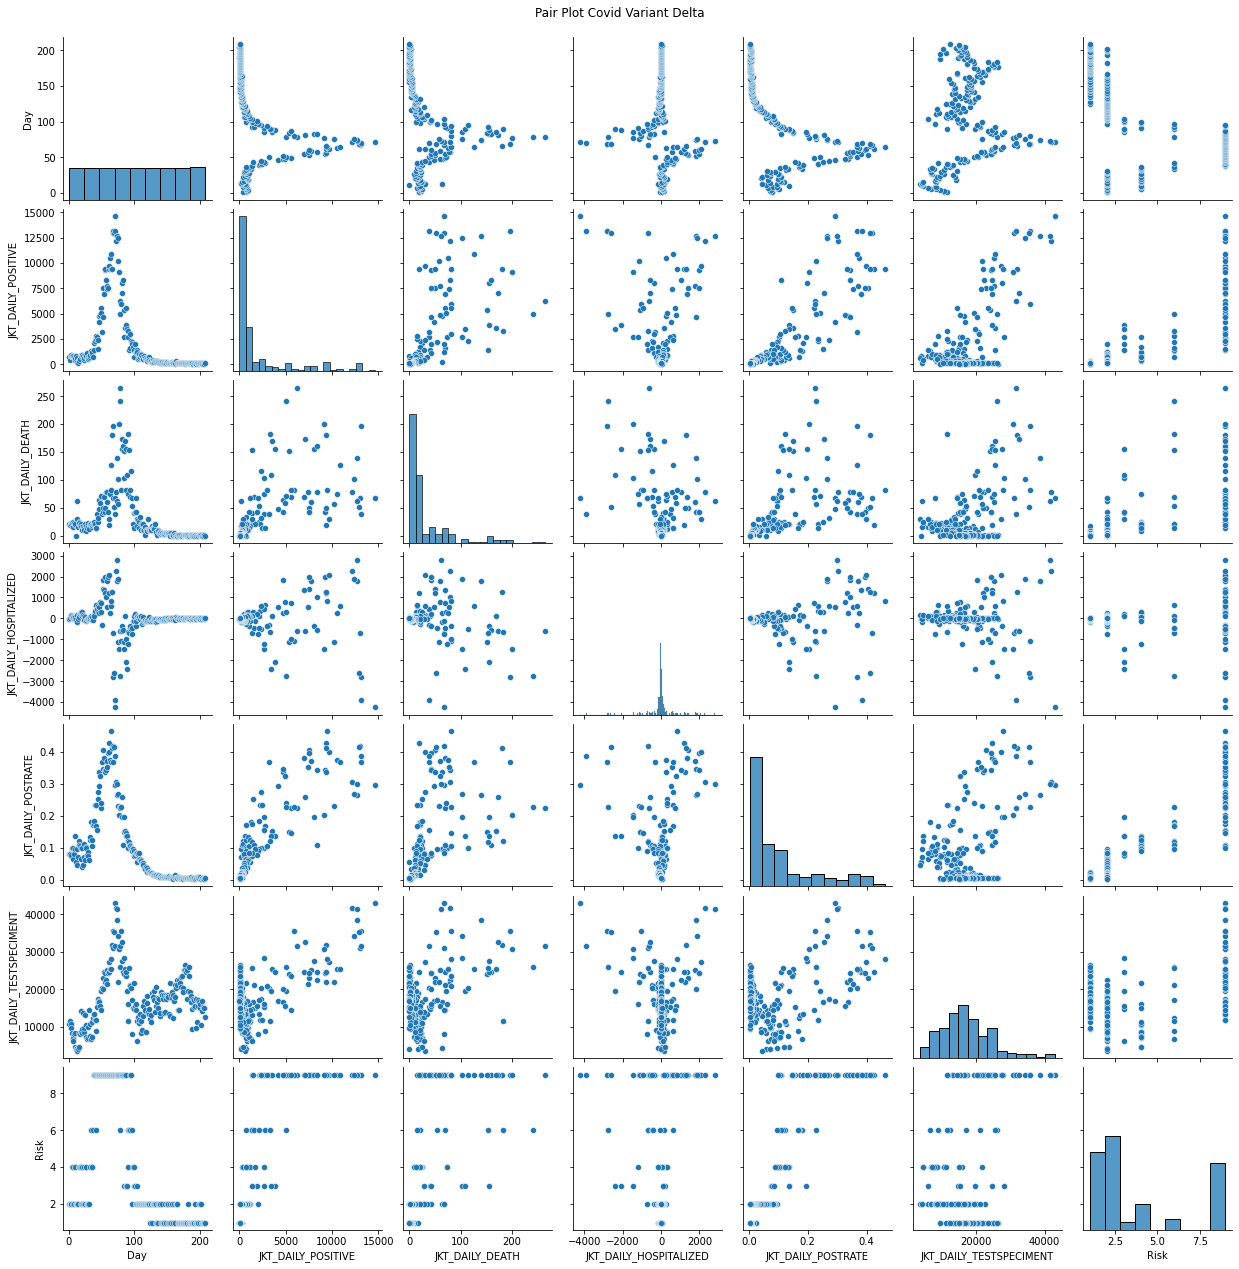

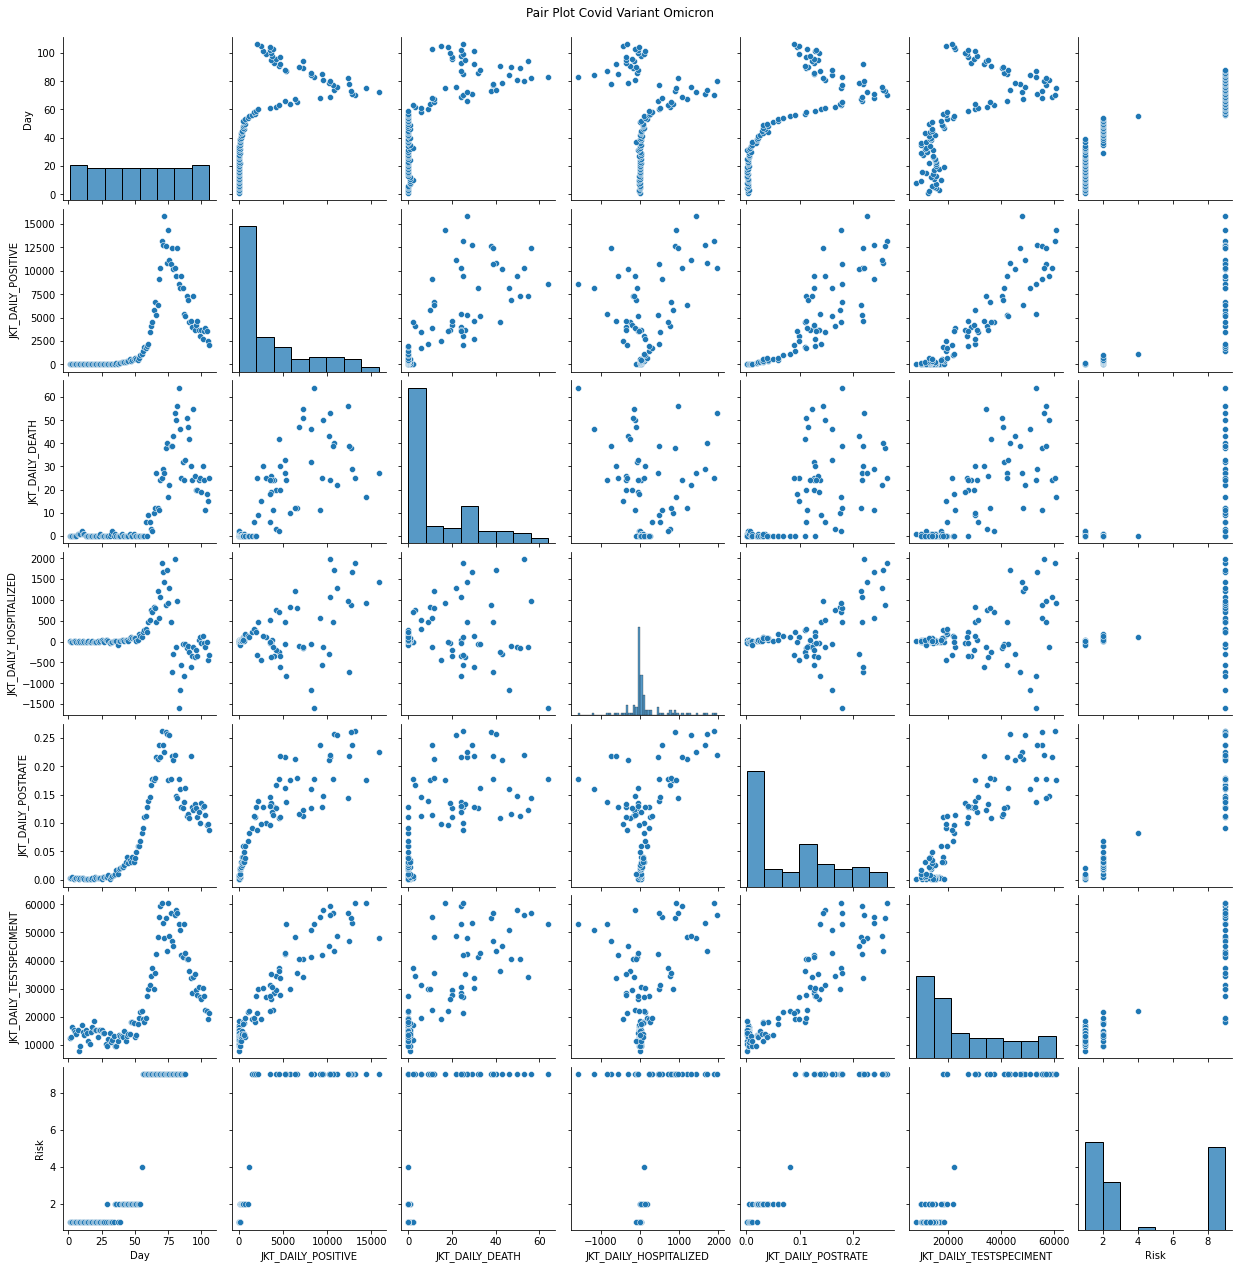

In [10]:
sns.pairplot(covid_ABG).fig.suptitle("Pair Plot Covid Variant Alpha - Beta - Gamma", y=1.01)
sns.pairplot(covid_Delta).fig.suptitle("Pair Plot Covid Variant Delta", y=1.01)
sns.pairplot(covid_Omicron).fig.suptitle("Pair Plot Covid Variant Omicron", y=1.01)

In [11]:
corrdata_ABG = covid_ABG.corr()

corrdata_ABG

,Day,JKT_DAILY_POSITIVE,JKT_DAILY_DEATH,JKT_DAILY_HOSPITALIZED,JKT_DAILY_POSTRATE,JKT_DAILY_TESTSPECIMENT,Risk
Day,1.000000,0.697578,0.633007,-0.025807,0.123077,0.760544,0.587628
JKT_DAILY_POSITIVE,0.697578,1.000000,0.774591,0.118637,0.326651,0.782815,0.832735
JKT_DAILY_DEATH,0.633007,0.774591,1.000000,-0.006659,0.292068,0.650004,0.660892
JKT_DAILY_HOSPITALIZED,-0.025807,0.118637,-0.006659,1.000000,0.032442,0.027089,0.246267
JKT_DAILY_POSTRATE,0.123077,0.326651,0.292068,0.032442,1.000000,0.082729,0.432389
JKT_DAILY_TESTSPECIMENT,0.760544,0.782815,0.650004,0.027089,0.082729,1.000000,0.672700
Risk,0.587628,0.832735,0.660892,0.246267,0.432389,0.672700,1.000000


<AxesSubplot:>

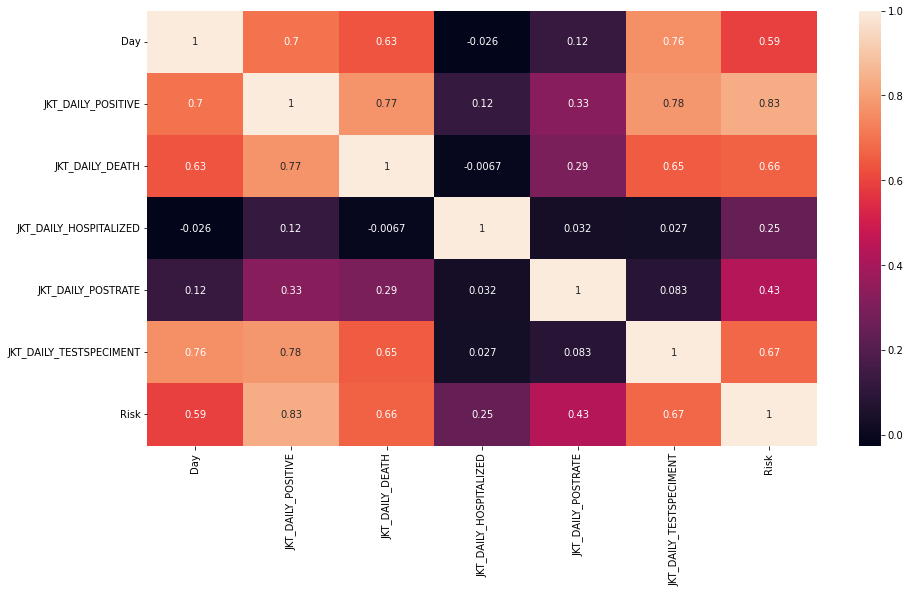

In [12]:
sns.heatmap(corrdata_ABG, annot=True)

In [13]:
corrdata_Delta = covid_Delta.corr()

corrdata_Delta

,Day,JKT_DAILY_POSITIVE,JKT_DAILY_DEATH,JKT_DAILY_HOSPITALIZED,JKT_DAILY_POSTRATE,JKT_DAILY_TESTSPECIMENT,Risk
Day,1.000000,-0.370518,-0.348633,-0.082729,-0.584683,0.177704,-0.558846
JKT_DAILY_POSITIVE,-0.370518,1.000000,0.642573,-0.000653,0.868112,0.694013,0.823806
JKT_DAILY_DEATH,-0.348633,0.642573,1.000000,-0.231899,0.571517,0.492677,0.658569
JKT_DAILY_HOSPITALIZED,-0.082729,-0.000653,-0.231899,1.000000,0.141326,-0.089613,0.102273
JKT_DAILY_POSTRATE,-0.584683,0.868112,0.571517,0.141326,1.000000,0.463248,0.903269
JKT_DAILY_TESTSPECIMENT,0.177704,0.694013,0.492677,-0.089613,0.463248,1.000000,0.469357
Risk,-0.558846,0.823806,0.658569,0.102273,0.903269,0.469357,1.000000


<AxesSubplot:>

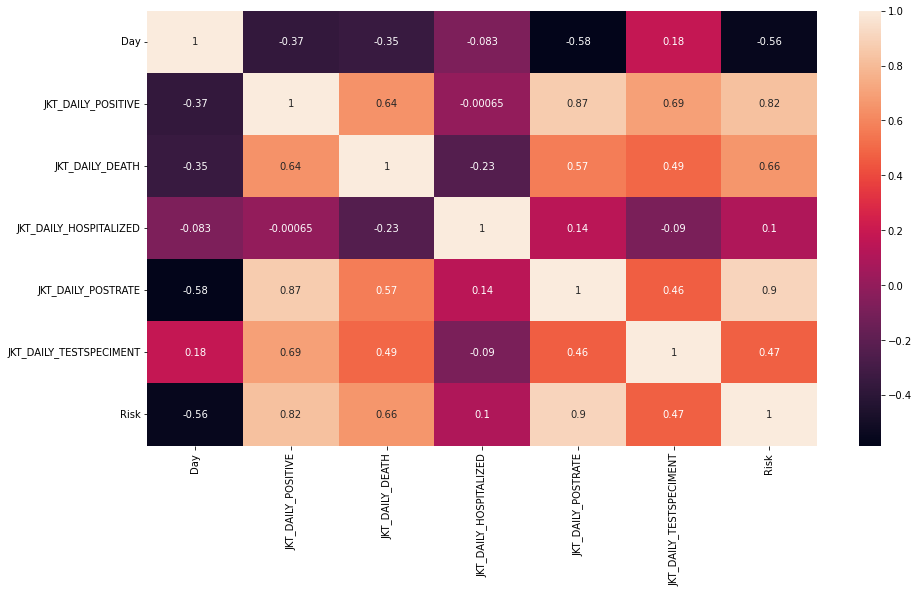

In [14]:
sns.heatmap(corrdata_Delta, annot=True)

In [15]:
corrdata_Omicron = covid_Omicron.corr()

corrdata_Omicron

,Day,JKT_DAILY_POSITIVE,JKT_DAILY_DEATH,JKT_DAILY_HOSPITALIZED,JKT_DAILY_POSTRATE,JKT_DAILY_TESTSPECIMENT,Risk
Day,1.000000,0.643534,0.737439,0.038041,0.757088,0.669143,0.879185
JKT_DAILY_POSITIVE,0.643534,1.000000,0.793573,0.434243,0.890415,0.940456,0.838799
JKT_DAILY_DEATH,0.737439,0.793573,1.000000,0.041471,0.718177,0.809114,0.735316
JKT_DAILY_HOSPITALIZED,0.038041,0.434243,0.041471,1.000000,0.442800,0.365307,0.406933
JKT_DAILY_POSTRATE,0.757088,0.890415,0.718177,0.442800,1.000000,0.902872,0.937033
JKT_DAILY_TESTSPECIMENT,0.669143,0.940456,0.809114,0.365307,0.902872,1.000000,0.878699
Risk,0.879185,0.838799,0.735316,0.406933,0.937033,0.878699,1.000000


<AxesSubplot:>

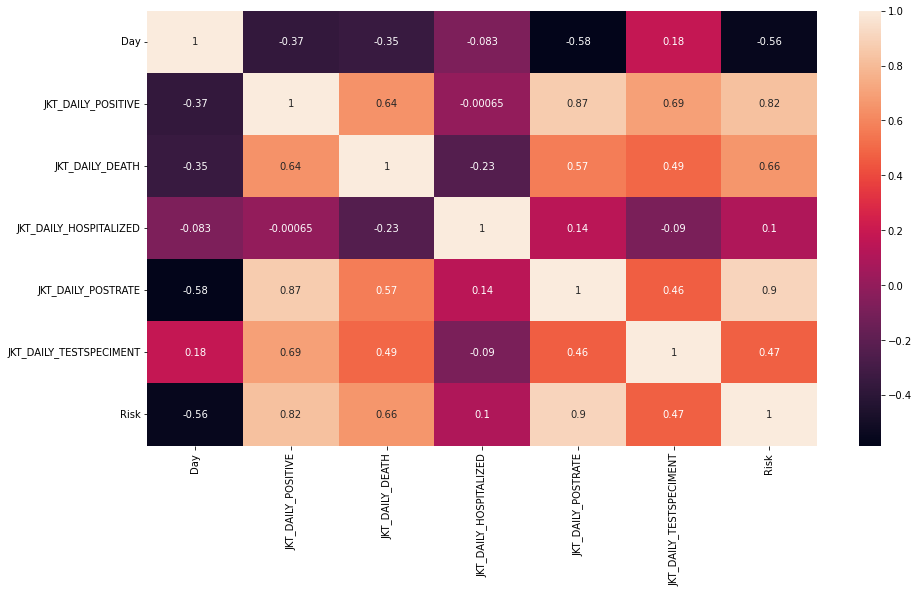

In [16]:
sns.heatmap(corrdata_Delta, annot=True)